## SCRIPT TO MAKE A NICE TABLE OUT OF RESULTS

In [1]:
import json 
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
!cd webnlgResults/webnlg_semantic_results && ls

Instances_KG        Subclasses_KG       multi_Subclasses_KG
Instances_list      Types_KG


In [47]:
#exp='webnlg_semantic_results'
#exp_columns=['Instances_list', 'Instances_KG' , 'Types_KG', 'Subclasses_KG' , 'multi_Subclasses_KG' ]

exp='webnlg_reification_results'
exp_columns=['entities_list','semantic_of_news']


results=[]
for i in exp_columns:
    path=f'./webnlgResults/{exp}/{i}/output_metrics.txt'

    with open(path) as f:
        data = f.read()
    data=data.split('\n')#print(type(data))
    data=[ast.literal_eval(x) for x in data if x!=''][1:]#remove empty lines and the first 
    #print(data)
    #results.append(data)
    planner=i
    bluu=data[0]['bleu']
    google_bleu=data[1]['google_bleu']
    meteor=data[2]['meteor']
    bertscore=data[3]['Bert_Score']['f1']
    bleurt=data[4]['scores']
    parent_score=data[5]['PARENT']['f_score']
    training_duration=data[6]['time(s)']
    gpuUSED=data[7]['gpu']

    scores=[i,bluu,google_bleu,meteor,bertscore,bleurt,parent_score,training_duration,gpuUSED]
    scores=[bluu,google_bleu,meteor,bertscore,bleurt,parent_score]
    scores=[round(x,3) for x in scores]
    scores=[(" ").join(i.split("_"))]+scores
    results.append(scores)
    for score in scores:
        print(score)

    d1=pd.DataFrame(data)
    #d1
    #d1.columns=['bleu','google_bleu','meteor','bertscore','bleurt','parent_score','training_duration','gpuUSED']


entities list
0.245
0.268
0.484
0.848
-0.301
0.316
semantic of news
0.216
0.24
0.435
0.828
-0.46
0.284


In [48]:
columns=['planner','BLEU','GBLEU','Meteor','BERTcore(f1)','BLEURT','PARENT(f)','training_duration','gpuUSED']
columns=['planner','BLEU','GBLEU','Meteor','BERTcore(f1)','BLEURT','PARENT(f)']

df1=pd.DataFrame(results,columns=columns)




In [49]:
print(df1.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
         planner &  BLEU &  GBLEU &  Meteor &  BERTcore(f1) &  BLEURT &  PARENT(f) \\
\midrule
   entities list & 0.245 &  0.268 &   0.484 &         0.848 &  -0.301 &      0.316 \\
semantic of news & 0.216 &  0.240 &   0.435 &         0.828 &  -0.460 &      0.284 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_12327/1468421615.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.to_latex(index=False))


## GRAPHS

In [14]:
names=os.listdir('./webnlg_gridsearch/Types/')
names

['0.0001_3_2_output_metrics.json',
 '0.0001_3_3_output_metrics.json',
 '0.0001_1_4_output_metrics.json',
 '0.0001_1_3_output_metrics.json',
 '0.0001_1_2_output_metrics.json',
 '0.0001_3_4_output_metrics.json',
 '0.0001_4_4_output_metrics.json',
 '0.0001_4_3_output_metrics.json',
 '0.0001_4_2_output_metrics.json',
 '0.0001_2_2_output_metrics.json',
 '0.0001_2_3_output_metrics.json',
 '0.0001_2_4_output_metrics.json']

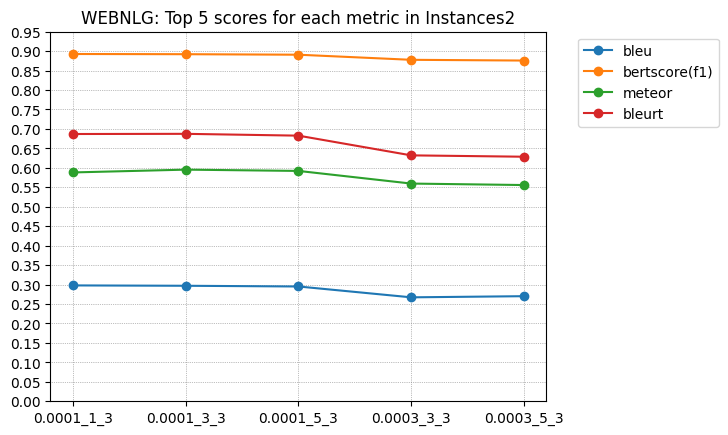

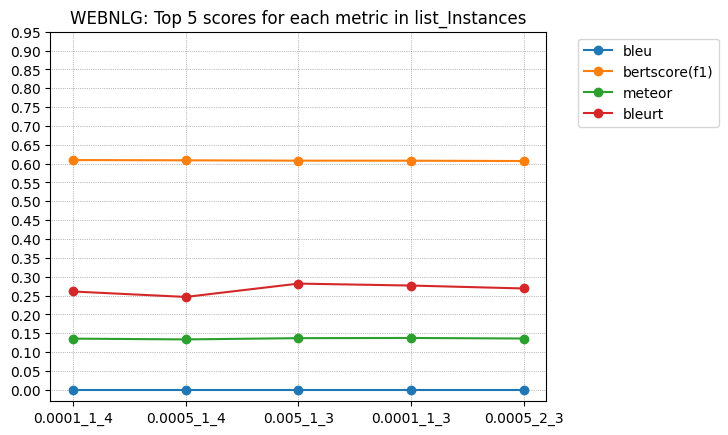

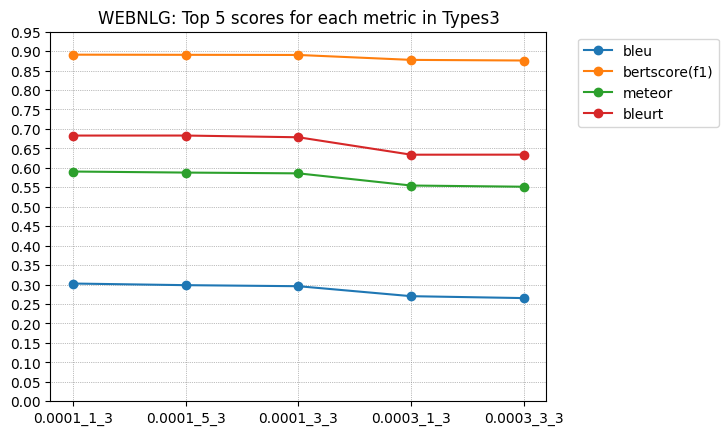

In [24]:
def get_df_scores(filename):
    names=os.listdir(filename)
    blues={}
    bertscores={}
    meteors={}
    bleurts={}
    df_list=[]
    for n in names:
        #print(n)
        with open(filename+n,'r') as f:
            scores = json.load(f)
            vals=n.split('_output_')[0]
            #print(vals)        #print(scores[1])

            blues[vals]=scores[1]['bleu']
            bertscores[vals]=scores[4]['Bert_Score']['f1']
            meteors[vals]=scores[3]['meteor']
            bleurts[vals]=scores[5]['bleurt_score']
            
            df_list.append((vals,scores[1]['bleu'],scores[4]['Bert_Score']['f1'],scores[3]['meteor'],scores[5]['bleurt_score']))
        

    df = pd.DataFrame(df_list, columns=['vals', 'bleu', 'bertscore(f1)','meteor','bleurt'])
    df = df.sort_values(by='bertscore(f1)', ascending=False).head(5)
    plt.plot(df['vals'], df['bleu'],label='bleu',marker='o')
    plt.plot(df['vals'], df['bertscore(f1)'],label='bertscore(f1)',marker='o')
    plt.plot(df['vals'], df['meteor'],label='meteor',marker='o')
    plt.plot(df['vals'], df['bleurt'],label='bleurt',marker='o')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(color='grey', linestyle=':', linewidth=0.5)
    yticks = np.arange(0, 1, 0.05)
    plt.yticks(yticks)
    plt.title(f'WEBNLG: Top 5 scores for each metric in {filename.split("/")[-2]}')
    plt.show()

get_df_scores('./webnlg_gridsearch/Instances2/')
get_df_scores('./webnlg_gridsearch/list_Instances/')
get_df_scores('./webnlg_gridsearch/Types3/')

## PER SCORE


{'5e-05_5_3': 0.2302745658869256, '5e-05_1_3': 0.23187352258167382, '3e-06_1_3': 0.23322341532462634, '3e-06_3_3': 0.23339237370082347, '3e-06_5_3': 0.2352139892074324, '0.0005_1_3': 0.24458208260152203, '0.0003_1_3': 0.2555157068585605, '0.0003_3_3': 0.26717179883222614, '0.0003_5_3': 0.27012543307894293, '0.0001_5_3': 0.2950636686680576, '0.0001_3_3': 0.2968857598474111, '0.0001_1_3': 0.297811417454515}


<BarContainer object of 12 artists>

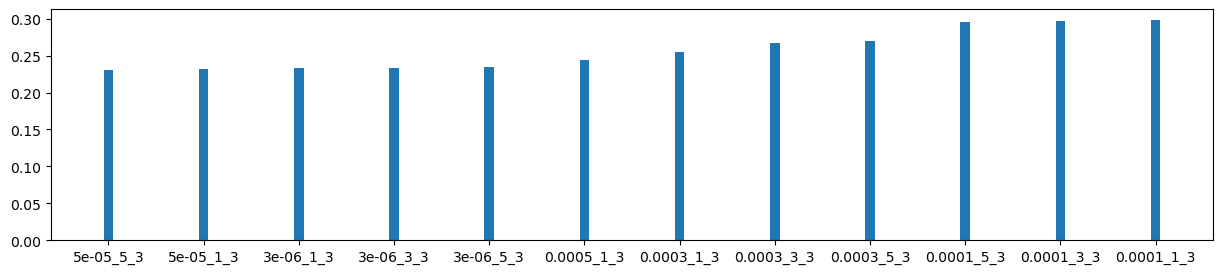

In [25]:

blues={k: v for k, v in sorted(blues.items(), key=lambda item: item[1]) if v>0.23}
print(blues)

# Data for plotting
plt.figure(figsize=(15, 3))  # width:20, height:3
plt.bar((blues.keys()),blues.values(),width=0.1)
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)


(0.7, 1.0)

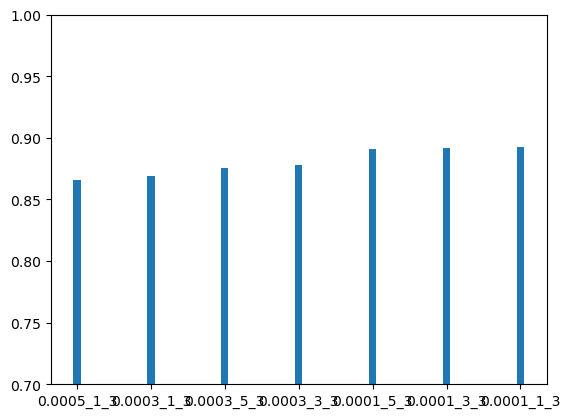

In [26]:
bertscores={k: v for k, v in sorted(bertscores.items(), key=lambda item: item[1]) if v>0.86 }
fig, ax = plt.subplots()

ax.bar((bertscores.keys()),bertscores.values(),width=0.1)

ax.set_ylim(0.7, 1)  # outliers only

<BarContainer object of 6 artists>

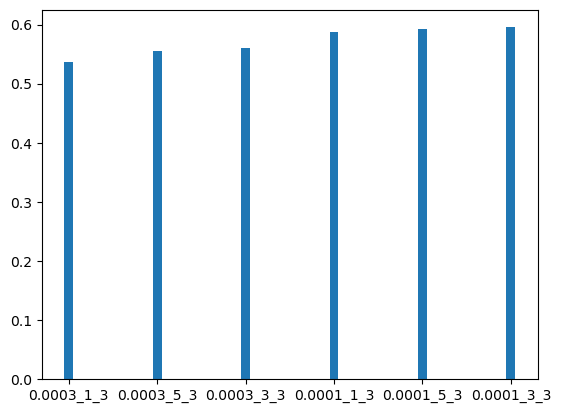

In [27]:
meteors={k: v for k, v in sorted(meteors.items(), key=lambda item: item[1]) if v>0.53 }
fig, ax = plt.subplots()
ax.bar((meteors.keys()),meteors.values(),width=0.1)

<BarContainer object of 6 artists>

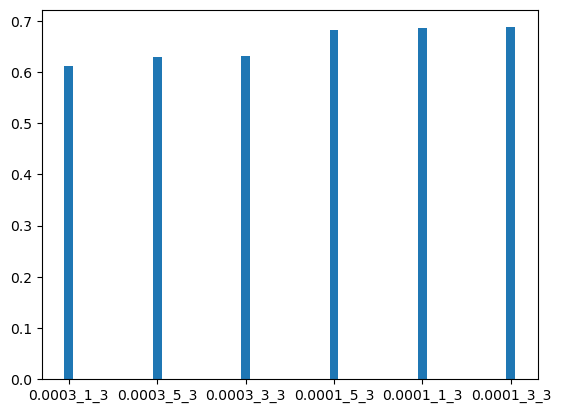

In [28]:
bleurts={k: v for k, v in sorted(bleurts.items(), key=lambda item: item[1]) if v>0.6 }
fig, ax = plt.subplots()
ax.bar((bleurts.keys()),bleurts.values(),width=0.1)

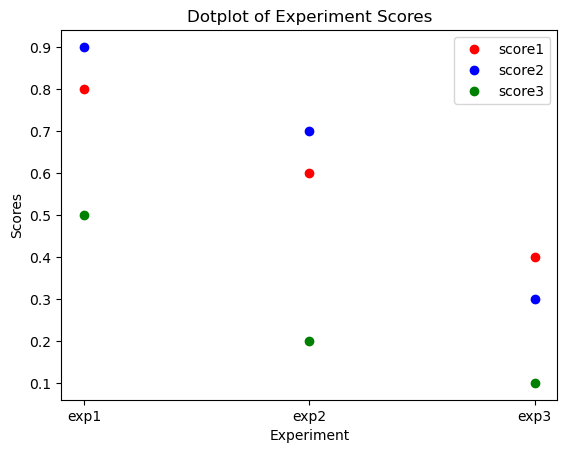

In [29]:
import matplotlib.pyplot as plt

# define the scores for each experiment
exp1_scores = [0.8, 0.6, 0.4]
exp2_scores = [0.9, 0.7, 0.3]
exp3_scores = [0.5, 0.2, 0.1]

# define the x-axis labels
x_labels = ['exp1', 'exp2', 'exp3']

# plot the scores using different colors
plt.plot(x_labels, exp1_scores, 'ro', label='score1')
plt.plot(x_labels, exp2_scores, 'bo', label='score2')
plt.plot(x_labels, exp3_scores, 'go', label='score3')

# set the axis labels and title
plt.xlabel('Experiment')
plt.ylabel('Scores')
plt.title('Dotplot of Experiment Scores')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

